<IPython.core.display.Javascript object>


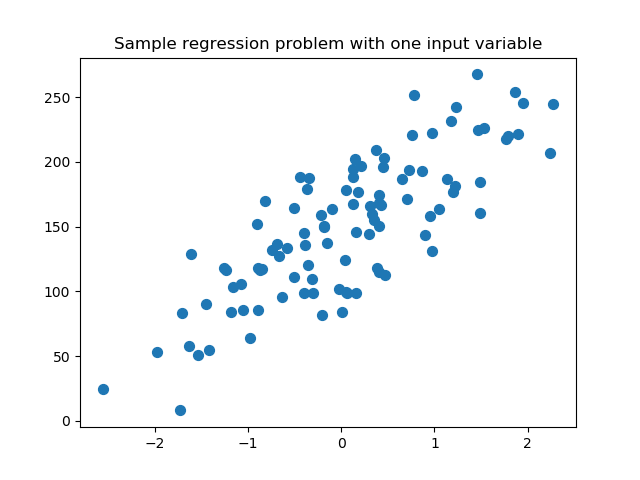

<IPython.core.display.Javascript object>


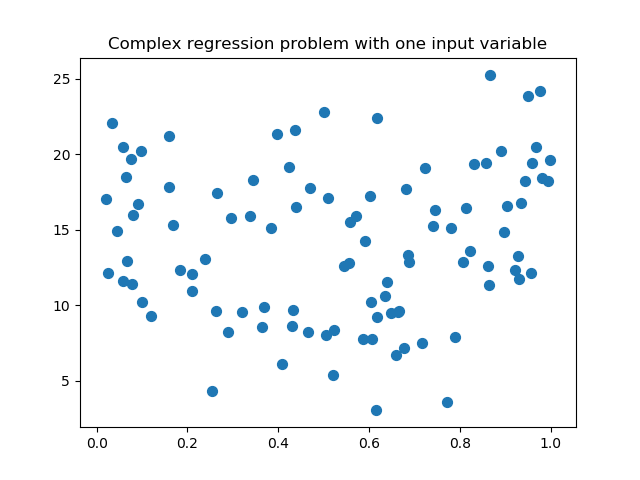

<IPython.core.display.Javascript object>


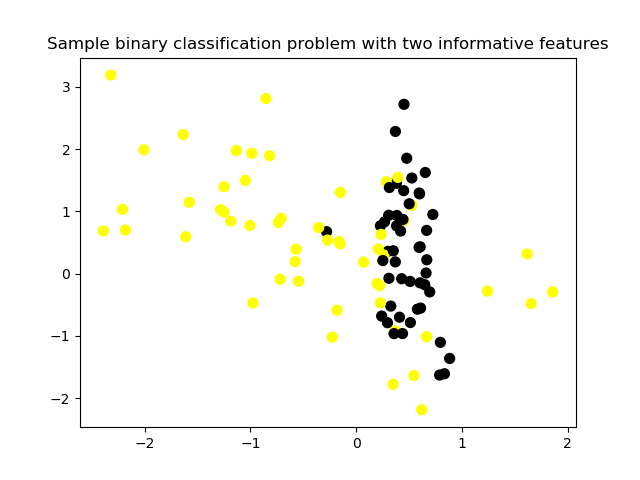

<IPython.core.display.Javascript object>


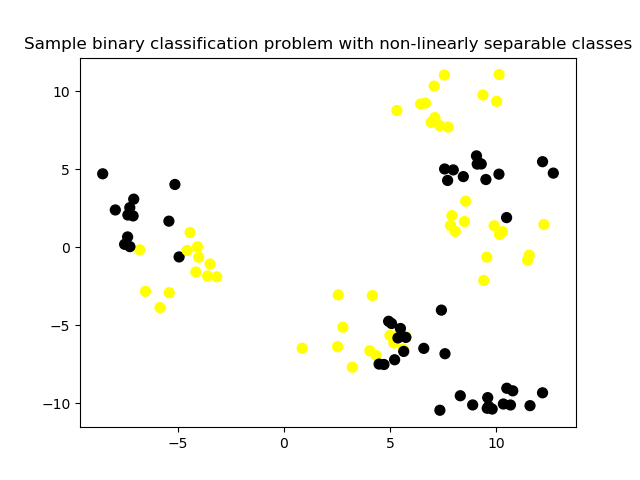

In [11]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer



cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('C:/Users/devro/Desktop/Jupyter/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


In [12]:
from sklearn.naive_bayes import GaussianNB
X_train,X_test,y_train,y_test = train_test_split(X_C2,y_C2,random_state=0)
nbclf = GaussianNB().fit(X_train,y_train)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)
clf = GaussianNB().fit(X_train,y_train)
print('Accuracy Score on Training Set:{:.2f}'.format(clf.score(X_train,y_train)))
print("Accuracy Score on Test Set:{:.2f}".format(clf.score(X_test,y_test)))

Accuracy Score on Training Set:0.95
Accuracy Score on Test Set:0.94


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)
clf = RandomForestClassifier().fit(X_train,y_train)
print("Training Accuracy: {:.2f}".format(clf.score(X_train,y_train)))
print("Testing Accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Training Accuracy: 1.00
Testing Accuracy: 0.97


In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=[100,100],alpha=5.0,random_state=0,solver='lbfgs').fit(X_train_scaled,y_train)

print("Training Accuracy: {:.2f}".format(clf.score(X_train_scaled,y_train)))
print("Testing Accuracy: {:.2f}".format(clf.score(X_test_scaled,y_test)))

Training Accuracy: 0.98
Testing Accuracy: 0.97


In [32]:
from sklearn.neural_network import MLPRegressor
X_train,X_test,y_train,y_test = train_test_split(X_D2,y_D2,random_state=0)
mlpclf = MLPClassifier(hidden_layer_sizes=[10,10],activation='logistic',alpha=0.1,solver='lbfgs').fit(X_train,y_train)
print("Training Score:{:.2f}".format(mlpclf.score(X_train,y_train)))
print("Testing Score:{:.2f}".format(mlpclf.score(X_test,y_test)))

Training Score:0.93
Testing Score:0.76


C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [38]:
from sklearn.neural_network import MLPRegressor
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state=0)
mlpreg = MLPRegressor(activation='tanh',alpha=100,hidden_layer_sizes=[10,10],random_state=0,solver='lbfgs').fit(X_train,y_train)
print("Training Accuracy:{:.2f}".format(mlpreg.score(X_train,y_train)))
print("Testing Accuracy:{:.2f}".format(mlpreg.score(X_test,y_test)))

Training Accuracy:0.58
Testing Accuracy:0.49


C:\Users\devro\Anaconda3\NM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
